In [1]:
from thermostate import Q_, State, units
from numpy import linspace, zeros_like
import matplotlib.pyplot as plt

import warnings
from pint.errors import UnitStrippedWarning
warnings.simplefilter(action='ignore', category=UnitStrippedWarning)

In [2]:
p_1 = Q_(8.25, "MPa")
T_1 = Q_(315, "K")

p_7 = Q_(22, "MPa")
T_7 = Q_(750, "K")

T_5 = Q_(183.2, "degC")

substance = "CARBONDIOXIDE"

y = Q_(0.8, "dimensionless")

eta_MC = Q_(0.82, "dimensionless")
eta_R = Q_(0.78, "dimensionless")
eta_T = Q_(0.93, "dimensionless")
eta_HTR = Q_(0.95, "dimensionless")
eta_LTR = Q_(0.89, "dimensionless")

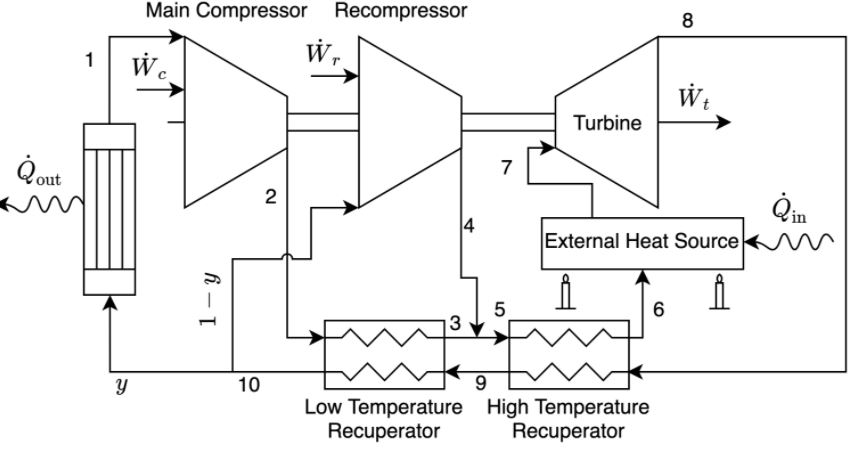

Fixing States:

|State |$$1$$         |$$2$$         |
|------|--------------|--------------|
|  1   |$$p_1$$       |$$T_1$$       |
|  2s  |$$p_2=p_7$$   |$$s_{2s}=s_1$$|
|  2   |$$p_2=p_7$$   |$$h_2$$       |
|  3   |$$p_3=p_7$$   |$$h_3$$       |
|  4s  |$$p_4=p_7$$   |$$s_{4s}=s_{10}$$|
|  4   |$$p_4=p_7$$   |$$h_4$$       |
|  5   |$$p_5=p_7$$   |$$T_5$$       |
|  6   |$$p_6=p_7$$   |$$h_6$$       |
|  7   |$$p_7$$       |$$T_7$$       |
|  8s  |$$p_8=p_1$$   |$$s_{8s}=s_7$$|
|  8   |$$p_8=p_1$$   |$$h_8$$       |
|  9'  |$$p_9=p_1$$   |$$T_9'=T_5$$  |
|  9   |$$p_9=p_1$$   |$$h_9$$       |
|  10' |$$p_{10}=p_1$$|$$T_{10'}=T_2$$|
|  10  |$$p_{10}=p_1$$|$$h_{10}$$    |

$h_2=\frac{(h_{2s}-h_1)}{\eta_{MC}}+h_1$

$h_8 = \eta_T(h_{8s}-h_7)+h_7$

$h_6 = \eta_{HTR}(h_8-h_9')+h_5$

$h_9 = h_5+h_8 - h_9$

$h_3 = \frac{\eta_{LTR}(h_9-h_{10}')}{y} + h_2$

$h_{10} = y(h_2-h_3)+h_9$

$h_4 = \frac{(h_{4s}-h_{10})}{\eta_{R}}+h_{10}$




Mass equations:

$\dot m_y = y\dot m$

In [3]:
st_1 = State(substance, p=p_1, T=T_1)

st_2s = State(substance, p=p_7, s=st_1.s)
h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
st_2 = State(substance, p=p_7, h=h_2)


st_7 = State(substance, p=p_7,T=T_7)

st_8s = State(substance, p=p_1, s=st_7.s)
h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
st_8 = State(substance, p=p_1, h=h_8)

st_5 = State(substance, p=p_7, T=T_5)

st_9p = State(substance, p=p_1, T=st_5.T)

h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
st_6 = State(substance, p=p_7, h=h_6)

h_9 = st_5.h+st_8.h-st_6.h
st_9 = State(substance, p=p_1, h=h_9)

st_10p = State(substance, p=p_1, T=st_2.T)

h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
st_3 = State(substance, p=p_7, h=h_3)

h_10 = y*(st_2.h-st_3.h)+st_9.h
st_10 = State(substance, p=p_1, h=h_10)

st_4s = State(substance, p=p_7, s=st_10.s)
h_4 = (st_4s.h-h_10)/eta_R + h_10
st_4 = State(substance, p=p_7, h=h_4)

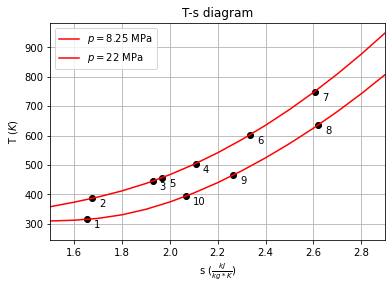

In [4]:
import matplotlib.pyplot as plt
import numpy as np

s_range = np.arange(1,3,0.1)*(units.kJ/units.kg/units.K)
T_range = np.arange(216.492,304.1282,1)*units.K

def plot_isobar(p):
    result = []
    for i in s_range:
        st_i = State(substance,p=p,s=i)
        result.append(st_i.T.magnitude)
    return result

def plot_satliquid():
    result = []
    for i in T_range:
        st_i = State(substance,T=i,x=Q_(0.0, 'dimensionless'))
        result.append(st_i.s.to("kJ/kg/K").magnitude)
    return result

def plot_satvapor():
    result = []
    for i in T_range:
        st_i = State(substance,T=i,x=Q_(1.0, 'dimensionless'))
        result.append(st_i.s.to("kJ/kg/K").magnitude)
    return result


state = ["1","2","3","4","5","6","7","8","9","10"]
s_points = [st_1.s.to("kJ/kg/K").magnitude,st_2.s.to("kJ/kg/K").magnitude,st_3.s.to("kJ/kg/K").magnitude,
            st_4.s.to("kJ/kg/K").magnitude,st_5.s.to("kJ/kg/K").magnitude,st_6.s.to("kJ/kg/K").magnitude,
            st_7.s.to("kJ/kg/K").magnitude,st_8.s.to("kJ/kg/K").magnitude,st_9.s.to("kJ/kg/K").magnitude,
            st_10.s.to("kJ/kg/K").magnitude]
T_points = [st_1.T.magnitude,st_2.T.magnitude,st_3.T.magnitude,st_4.T.magnitude,st_5.T.magnitude,
            st_6.T.magnitude,st_7.T.magnitude,st_8.T.magnitude,st_9.T.magnitude,st_10.T.magnitude]

colors_list = "kkkkkkkkkk"
for i in range(len(colors_list)):
    plt.plot(s_points[i],T_points[i],colors_list[i]+"o")
    plt.annotate(state[i],(s_points[i]+0.03,T_points[i]-30))

plt.plot(s_range.magnitude,plot_isobar(st_7.p),"r-",label = "$p=8.25$ MPa")
plt.plot(s_range.magnitude,plot_isobar(st_1.p),"r-",label = "$p=22$ MPa")
#plt.plot(plot_satliquid(),T_range,"k--")
#plt.plot(plot_satvapor(),T_range,"k--")

plt.xlim(1.5,2.9)
#plt.ylim(200,850)
plt.xlabel("s ($\\frac{kJ}{kg*K}$)")
plt.ylabel("T ($K$)")
plt.title("T-s diagram")
plt.grid(True)
plt.legend()
plt.show()

$\dot W_{MC} = y\dot m(h_1-h_2)\tag{1}$

$\dot W_{R} = (1-y)\dot m(h_{10}-h_4)\tag{2}$

$\dot W_{T} = \dot m(h_7-h_8)\tag{3}$

$\dot Q_{in} = \dot m(h_7-h_6)\tag{4}$

In [5]:
mdot = Q_(50, "kg/s")
Wdot_MC = y*mdot*(st_1.h-st_2.h)
Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
Wdot_T = mdot*(st_7.h-st_8.h)
Wdot_net = Wdot_MC + Wdot_R + Wdot_T
print(Wdot_net.to("MW").round(2))
Q_in = mdot*(st_7.h-st_6.h)
print(Q_in.to("MW").round(2))
eta = Wdot_net/Q_in
print(eta.round(4))
print(y)

3.35 megawatt
9.08 megawatt
0.3688 dimensionless
0.8 dimensionless


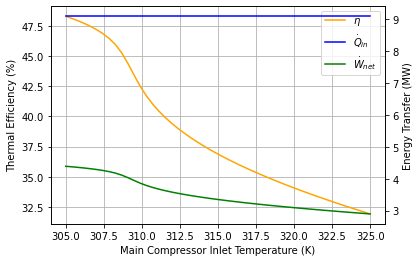

In [6]:
def T1_vs_Wdot_Qdotin_eta(T_1):
    st_1 = State(substance, p=p_1, T=T_1)
    st_2s = State(substance, p=p_7, s=st_1.s)
    h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
    st_2 = State(substance, p=p_7, h=h_2)
    st_7 = State(substance, p=p_7,T=T_7)
    st_8s = State(substance, p=p_1, s=st_7.s)
    h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
    st_8 = State(substance, p=p_1, h=h_8)
    st_5 = State(substance, p=p_7, T=T_5)
    st_9p = State(substance, p=p_1, T=st_5.T)
    h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
    st_6 = State(substance, p=p_7, h=h_6)
    h_9 = st_5.h+st_8.h-st_6.h
    st_9 = State(substance, p=p_1, h=h_9)
    st_10p = State(substance, p=p_1, T=st_2.T)
    h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
    st_3 = State(substance, p=p_7, h=h_3)
    h_10 = y*(st_2.h-st_3.h)+st_9.h
    st_10 = State(substance, p=p_1, h=h_10)
    st_4s = State(substance, p=p_7, s=st_10.s)
    h_4 = (st_4s.h-h_10)/eta_R + h_10
    st_4 = State(substance, p=p_7, h=h_4)
    
    mdot = Q_(50, "kg/s")
    Wdot_MC = y*mdot*(st_1.h-st_2.h)
    Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
    Wdot_T = mdot*(st_7.h-st_8.h)
    Wdot_net = Wdot_MC + Wdot_R + Wdot_T
    Q_in = mdot*(st_7.h-st_6.h)
    eta = Wdot_net/Q_in
    
    return eta, Wdot_net, Q_in
    
T_1_vals = linspace(305,325)*units.K
eta_vals = zeros_like(T_1_vals)*units.percent
Wdot_net_vals = zeros_like(T_1_vals)*units.MW
Qdot_in_vals = zeros_like(T_1_vals)*units.MW

for i, T_1_i in enumerate(T_1_vals):
    eta_vals[i],Wdot_net_vals[i],Qdot_in_vals[i]=T1_vs_Wdot_Qdotin_eta(T_1_i)

fig, eta_ax = plt.subplots()
eta_ax.plot(T_1_vals, eta_vals, color='orange', label='$\eta$')
eta_ax.set_xlabel('Main Compressor Inlet Temperature (K)')
eta_ax.set_ylabel('Thermal Efficiency (%)')
eta_ax.grid()

energy_ax = eta_ax.twinx()
energy_ax.plot(T_1_vals, Qdot_in_vals, color="blue", label='$\dotQ_{in}$')
energy_ax.plot(T_1_vals, Wdot_net_vals,color="green",label='$\dotW_{net}$')
energy_ax.set_ylabel('Energy Transfer (MW)')

lines, labels = eta_ax.get_legend_handles_labels()
lines2, labels2 = energy_ax.get_legend_handles_labels()
eta_ax.legend(lines + lines2, labels + labels2, loc='best');

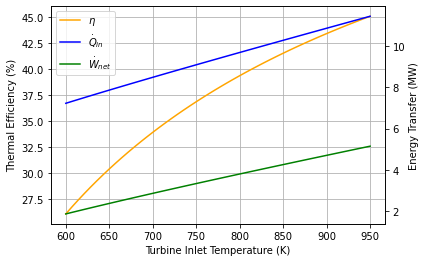

In [7]:
def T7_vs_Wdot_Qdotin_eta(T_7):
    st_1 = State(substance, p=p_1, T=T_1)
    st_2s = State(substance, p=p_7, s=st_1.s)
    h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
    st_2 = State(substance, p=p_7, h=h_2)
    st_7 = State(substance, p=p_7,T=T_7)
    st_8s = State(substance, p=p_1, s=st_7.s)
    h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
    st_8 = State(substance, p=p_1, h=h_8)
    st_5 = State(substance, p=p_7, T=T_5)
    st_9p = State(substance, p=p_1, T=st_5.T)
    h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
    st_6 = State(substance, p=p_7, h=h_6)
    h_9 = st_5.h+st_8.h-st_6.h
    st_9 = State(substance, p=p_1, h=h_9)
    st_10p = State(substance, p=p_1, T=st_2.T)
    h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
    st_3 = State(substance, p=p_7, h=h_3)
    h_10 = y*(st_2.h-st_3.h)+st_9.h
    st_10 = State(substance, p=p_1, h=h_10)
    st_4s = State(substance, p=p_7, s=st_10.s)
    h_4 = (st_4s.h-h_10)/eta_R + h_10
    st_4 = State(substance, p=p_7, h=h_4)
    
    mdot = Q_(50, "kg/s")
    Wdot_MC = y*mdot*(st_1.h-st_2.h)
    Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
    Wdot_T = mdot*(st_7.h-st_8.h)
    Wdot_net = Wdot_MC + Wdot_R + Wdot_T
    Q_in = mdot*(st_7.h-st_6.h)
    eta = Wdot_net/Q_in
    
    return eta, Wdot_net, Q_in
    
T_7_vals = linspace(600,950)*units.K
eta_vals = zeros_like(T_7_vals)*units.percent
Wdot_net_vals = zeros_like(T_7_vals)*units.MW
Qdot_in_vals = zeros_like(T_7_vals)*units.MW

for i, T_7_i in enumerate(T_7_vals):
    eta_vals[i],Wdot_net_vals[i],Qdot_in_vals[i]=T7_vs_Wdot_Qdotin_eta(T_7_i)

fig, eta_ax = plt.subplots()
eta_ax.plot(T_7_vals, eta_vals, color='orange', label='$\eta$')
eta_ax.set_xlabel('Turbine Inlet Temperature (K)')
eta_ax.set_ylabel('Thermal Efficiency (%)')
eta_ax.grid()

energy_ax = eta_ax.twinx()
energy_ax.plot(T_7_vals, Qdot_in_vals, color="blue", label='$\dotQ_{in}$')
energy_ax.plot(T_7_vals, Wdot_net_vals,color="green",label='$\dotW_{net}$')
energy_ax.set_ylabel('Energy Transfer (MW)')

lines, labels = eta_ax.get_legend_handles_labels()
lines2, labels2 = energy_ax.get_legend_handles_labels()
eta_ax.legend(lines + lines2, labels + labels2, loc='best');

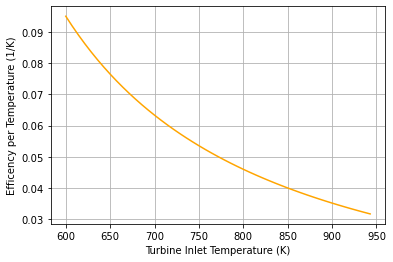

In [8]:
import numpy as np
def T7_vs_Wdot_Qdotin_eta(T_7):
    st_1 = State(substance, p=p_1, T=T_1)
    st_2s = State(substance, p=p_7, s=st_1.s)
    h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
    st_2 = State(substance, p=p_7, h=h_2)
    st_7 = State(substance, p=p_7,T=T_7)
    st_8s = State(substance, p=p_1, s=st_7.s)
    h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
    st_8 = State(substance, p=p_1, h=h_8)
    st_5 = State(substance, p=p_7, T=T_5)
    st_9p = State(substance, p=p_1, T=st_5.T)
    h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
    st_6 = State(substance, p=p_7, h=h_6)
    h_9 = st_5.h+st_8.h-st_6.h
    st_9 = State(substance, p=p_1, h=h_9)
    st_10p = State(substance, p=p_1, T=st_2.T)
    h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
    st_3 = State(substance, p=p_7, h=h_3)
    h_10 = y*(st_2.h-st_3.h)+st_9.h
    st_10 = State(substance, p=p_1, h=h_10)
    st_4s = State(substance, p=p_7, s=st_10.s)
    h_4 = (st_4s.h-h_10)/eta_R + h_10
    st_4 = State(substance, p=p_7, h=h_4)
    
    mdot = Q_(50, "kg/s")
    Wdot_MC = y*mdot*(st_1.h-st_2.h)
    Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
    Wdot_T = mdot*(st_7.h-st_8.h)
    Wdot_net = Wdot_MC + Wdot_R + Wdot_T
    Q_in = mdot*(st_7.h-st_6.h)
    eta = Wdot_net/Q_in
    
    return eta
    
T_7_vals = linspace(600,950)*units.K
eta_vals = zeros_like(T_7_vals)*units.percent

for i in range(len(eta_vals)):
    eta_vals[i] = T7_vs_Wdot_Qdotin_eta(T_7_vals[i])

    
T_7_vals = T_7_vals.magnitude
eta_vals = eta_vals.magnitude

deriv = np.diff(eta_vals)/np.diff(T_7_vals)

plt.plot(T_7_vals[0:49],deriv, color='orange')
plt.xlabel('Turbine Inlet Temperature (K)')
plt.ylabel('Efficency per Temperature (1/K)')
plt.grid(True)
plt.show()

0.8 dimensionless
0.8 dimensionless


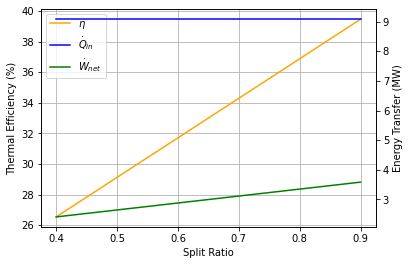

In [9]:
def y_vs_Wdot_Qdotin_eta(y):
    st_1 = State(substance, p=p_1, T=T_1)
    st_2s = State(substance, p=p_7, s=st_1.s)
    h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
    st_2 = State(substance, p=p_7, h=h_2)
    st_7 = State(substance, p=p_7,T=T_7)
    st_8s = State(substance, p=p_1, s=st_7.s)
    h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
    st_8 = State(substance, p=p_1, h=h_8)
    st_5 = State(substance, p=p_7, T=T_5)
    st_9p = State(substance, p=p_1, T=st_5.T)
    h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
    st_6 = State(substance, p=p_7, h=h_6)
    h_9 = st_5.h+st_8.h-st_6.h
    st_9 = State(substance, p=p_1, h=h_9)
    st_10p = State(substance, p=p_1, T=st_2.T)
    h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
    st_3 = State(substance, p=p_7, h=h_3)
    h_10 = y*(st_2.h-st_3.h)+st_9.h
    st_10 = State(substance, p=p_1, h=h_10)
    st_4s = State(substance, p=p_7, s=st_10.s)
    h_4 = (st_4s.h-h_10)/eta_R + h_10
    st_4 = State(substance, p=p_7, h=h_4)
    
    mdot = Q_(50, "kg/s")
    Wdot_MC = y*mdot*(st_1.h-st_2.h)
    Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
    Wdot_T = mdot*(st_7.h-st_8.h)
    Wdot_net = Wdot_MC + Wdot_R + Wdot_T
    Q_in = mdot*(st_7.h-st_6.h)
    eta = Wdot_net/Q_in
    
    return eta, Wdot_net, Q_in
print(y)    
y_vals = linspace(0.4,0.9)
eta_vals = zeros_like(y_vals)*units.percent
Wdot_net_vals = zeros_like(y_vals)*units.MW
Qdot_in_vals = zeros_like(y_vals)*units.MW

for i, y_i in enumerate(y_vals):
    eta_vals[i],Wdot_net_vals[i],Qdot_in_vals[i]=y_vs_Wdot_Qdotin_eta(y_i)

fig, eta_ax = plt.subplots()
eta_ax.plot(y_vals, eta_vals, color='orange', label='$\eta$')
eta_ax.set_xlabel('Split Ratio')
eta_ax.set_ylabel('Thermal Efficiency (%)')
eta_ax.grid()

energy_ax = eta_ax.twinx()
energy_ax.plot(y_vals, Qdot_in_vals, color="blue", label='$\dotQ_{in}$')
energy_ax.plot(y_vals, Wdot_net_vals,color="green",label='$\dotW_{net}$')
energy_ax.set_ylabel('Energy Transfer (MW)')

lines, labels = eta_ax.get_legend_handles_labels()
lines2, labels2 = energy_ax.get_legend_handles_labels()
eta_ax.legend(lines + lines2, labels + labels2, loc='best');
print(y)

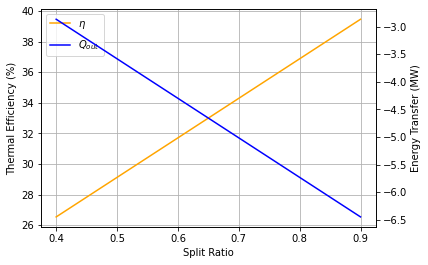

In [10]:
import numpy as np
def y_vs_Wdot_Qdotin_eta(y):
    st_1 = State(substance, p=p_1, T=T_1)
    st_2s = State(substance, p=p_7, s=st_1.s)
    h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
    st_2 = State(substance, p=p_7, h=h_2)
    st_7 = State(substance, p=p_7,T=T_7)
    st_8s = State(substance, p=p_1, s=st_7.s)
    h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
    st_8 = State(substance, p=p_1, h=h_8)
    st_5 = State(substance, p=p_7, T=T_5)
    st_9p = State(substance, p=p_1, T=st_5.T)
    h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
    st_6 = State(substance, p=p_7, h=h_6)
    h_9 = st_5.h+st_8.h-st_6.h
    st_9 = State(substance, p=p_1, h=h_9)
    st_10p = State(substance, p=p_1, T=st_2.T)
    h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
    st_3 = State(substance, p=p_7, h=h_3)
    h_10 = y*(st_2.h-st_3.h)+st_9.h
    st_10 = State(substance, p=p_1, h=h_10)
    st_4s = State(substance, p=p_7, s=st_10.s)
    h_4 = (st_4s.h-h_10)/eta_R + h_10
    st_4 = State(substance, p=p_7, h=h_4)
    
    mdot = Q_(50, "kg/s")
    Wdot_MC = y*mdot*(st_1.h-st_2.h)
    Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
    Wdot_T = mdot*(st_7.h-st_8.h)
    Wdot_net = Wdot_MC + Wdot_R + Wdot_T
    Q_in = mdot*(st_7.h-st_6.h)
    eta = Wdot_net/Q_in
    Q_out = y*mdot*(st_1.h-st_10.h)
    
    return eta,Q_out
    
y_vals = linspace(0.4,0.9)
eta_vals = zeros_like(y_vals)*units.percent
Q_out_vals = zeros_like(T_7_vals)*units.MW

for i, y_i in enumerate(y_vals):
    eta_vals[i],Q_out_vals[i]=y_vs_Wdot_Qdotin_eta(y_i)


fig, eta_ax = plt.subplots()
eta_ax.plot(y_vals, eta_vals, color='orange', label='$\eta$')
eta_ax.set_xlabel('Split Ratio')
eta_ax.set_ylabel('Thermal Efficiency (%)')
eta_ax.grid()

energy_ax = eta_ax.twinx()
energy_ax.plot(y_vals, Q_out_vals, color="blue", label='$\dotQ_{out}$')
energy_ax.set_ylabel('Energy Transfer (MW)')

lines, labels = eta_ax.get_legend_handles_labels()
lines2, labels2 = energy_ax.get_legend_handles_labels()
eta_ax.legend(lines + lines2, labels + labels2, loc='best');

In [11]:
p_1 = Q_(8.25, "MPa")
T_1 = Q_(307.5, "K")

p_7 = Q_(22, "MPa")
T_7 = Q_(850, "K")

print(y)
y=Q_(0.8,"dimensionless")

st_1 = State(substance, p=p_1, T=T_1)

st_2s = State(substance, p=p_7, s=st_1.s)
h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
st_2 = State(substance, p=p_7, h=h_2)


st_7 = State(substance, p=p_7,T=T_7)

st_8s = State(substance, p=p_1, s=st_7.s)
h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
st_8 = State(substance, p=p_1, h=h_8)

st_5 = State(substance, p=p_7, T=T_5)

st_9p = State(substance, p=p_1, T=st_5.T)

h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
st_6 = State(substance, p=p_7, h=h_6)

h_9 = st_5.h+st_8.h-st_6.h
st_9 = State(substance, p=p_1, h=h_9)

st_10p = State(substance, p=p_1, T=st_2.T)

h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
st_3 = State(substance, p=p_7, h=h_3)

h_10 = y*(st_2.h-st_3.h)+st_9.h
st_10 = State(substance, p=p_1, h=h_10)

st_4s = State(substance, p=p_7, s=st_10.s)
h_4 = (st_4s.h-h_10)/eta_R + h_10
st_4 = State(substance, p=p_7, h=h_4)

mdot = Q_(50, "kg/s")
Wdot_MC = y*mdot*(st_1.h-st_2.h)
Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
Wdot_T = mdot*(st_7.h-st_8.h)
Wdot_net = Wdot_MC + Wdot_R + Wdot_T
print(Wdot_net.to("MW").round(2))
Q_in = mdot*(st_7.h-st_6.h)
print(Q_in.to("MW").round(2))
eta = Wdot_net/Q_in
print(eta.round(4))

0.8 dimensionless
5.17 megawatt
10.26 megawatt
0.5035 dimensionless


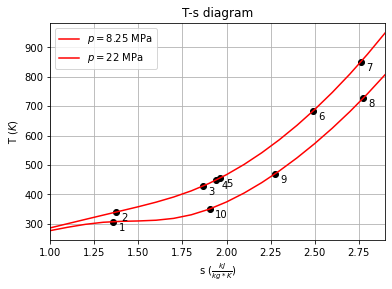

In [12]:
import matplotlib.pyplot as plt
import numpy as np

s_range = np.arange(1,3,0.1)*(units.kJ/units.kg/units.K)
T_range = np.arange(216.492,304.1282,1)*units.K

def plot_isobar(p):
    result = []
    for i in s_range:
        st_i = State(substance,p=p,s=i)
        result.append(st_i.T.magnitude)
    return result

def plot_satliquid():
    result = []
    for i in T_range:
        st_i = State(substance,T=i,x=Q_(0.0, 'dimensionless'))
        result.append(st_i.s.to("kJ/kg/K").magnitude)
    return result

def plot_satvapor():
    result = []
    for i in T_range:
        st_i = State(substance,T=i,x=Q_(1.0, 'dimensionless'))
        result.append(st_i.s.to("kJ/kg/K").magnitude)
    return result


state = ["1","2","3","4","5","6","7","8","9","10"]
s_points = [st_1.s.to("kJ/kg/K").magnitude,st_2.s.to("kJ/kg/K").magnitude,st_3.s.to("kJ/kg/K").magnitude,
            st_4.s.to("kJ/kg/K").magnitude,st_5.s.to("kJ/kg/K").magnitude,st_6.s.to("kJ/kg/K").magnitude,
            st_7.s.to("kJ/kg/K").magnitude,st_8.s.to("kJ/kg/K").magnitude,st_9.s.to("kJ/kg/K").magnitude,
            st_10.s.to("kJ/kg/K").magnitude]
T_points = [st_1.T.magnitude,st_2.T.magnitude,st_3.T.magnitude,st_4.T.magnitude,st_5.T.magnitude,
            st_6.T.magnitude,st_7.T.magnitude,st_8.T.magnitude,st_9.T.magnitude,st_10.T.magnitude]

colors_list = "kkkkkkkkkk"
for i in range(len(colors_list)):
    plt.plot(s_points[i],T_points[i],colors_list[i]+"o")
    plt.annotate(state[i],(s_points[i]+0.03,T_points[i]-30))

plt.plot(s_range.magnitude,plot_isobar(st_7.p),"r-",label = "$p=8.25$ MPa")
plt.plot(s_range.magnitude,plot_isobar(st_1.p),"r-",label = "$p=22$ MPa")
#plt.plot(plot_satliquid(),T_range,"k--")
#plt.plot(plot_satvapor(),T_range,"k--")

plt.xlim(1,2.9)
#plt.ylim(200,850)
plt.xlabel("s ($\\frac{kJ}{kg*K}$)")
plt.ylabel("T ($K$)")
plt.title("T-s diagram")
plt.grid(True)
plt.legend()
plt.show()

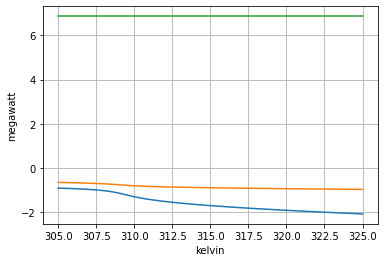

In [13]:
def T1_vs_Wdot_Qdotin_eta(T_1):
    st_1 = State(substance, p=p_1, T=T_1)
    st_2s = State(substance, p=p_7, s=st_1.s)
    h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
    st_2 = State(substance, p=p_7, h=h_2)
    st_7 = State(substance, p=p_7,T=T_7)
    st_8s = State(substance, p=p_1, s=st_7.s)
    h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
    st_8 = State(substance, p=p_1, h=h_8)
    st_5 = State(substance, p=p_7, T=T_5)
    st_9p = State(substance, p=p_1, T=st_5.T)
    h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
    st_6 = State(substance, p=p_7, h=h_6)
    h_9 = st_5.h+st_8.h-st_6.h
    st_9 = State(substance, p=p_1, h=h_9)
    st_10p = State(substance, p=p_1, T=st_2.T)
    h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
    st_3 = State(substance, p=p_7, h=h_3)
    h_10 = y*(st_2.h-st_3.h)+st_9.h
    st_10 = State(substance, p=p_1, h=h_10)
    st_4s = State(substance, p=p_7, s=st_10.s)
    h_4 = (st_4s.h-h_10)/eta_R + h_10
    st_4 = State(substance, p=p_7, h=h_4)
    
    mdot = Q_(50, "kg/s")
    Wdot_MC = y*mdot*(st_1.h-st_2.h)
    Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
    Wdot_T = mdot*(st_7.h-st_8.h)
    Wdot_net = Wdot_MC + Wdot_R + Wdot_T
    Q_in = mdot*(st_7.h-st_6.h)
    eta = Wdot_net/Q_in
    
    return Wdot_MC, Wdot_R, Wdot_T
    
T_1_vals = linspace(305,325)*units.K
Wdot_T_vals = zeros_like(T_1_vals)*units.MW
Wdot_MC_vals = zeros_like(T_1_vals)*units.MW
Wdot_R_vals = zeros_like(T_1_vals)*units.MW

for i, T_1 in enumerate(T_1_vals):
    Wdot_MC_vals[i],Wdot_R_vals[i],Wdot_T_vals[i]=T1_vs_Wdot_Qdotin_eta(T_1)

plt.plot(T_1_vals,Wdot_MC_vals, label="MC")
plt.plot(T_1_vals,Wdot_R_vals, label="RC")
plt.plot(T_1_vals,Wdot_T_vals,label = "T")
plt.grid(True)
plt.show()

In [14]:
p_1 = Q_(8.25, "MPa")
T_1 = Q_(307.5, "K")

p_7 = Q_(22, "MPa")
T_7 = Q_(750, "K")

y = Q_(0.8, "dimensionless")

st_1 = State(substance, p=p_1, T=T_1)

st_2s = State(substance, p=p_7, s=st_1.s)
h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
st_2 = State(substance, p=p_7, h=h_2)


st_7 = State(substance, p=p_7,T=T_7)

st_8s = State(substance, p=p_1, s=st_7.s)
h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
st_8 = State(substance, p=p_1, h=h_8)

st_5 = State(substance, p=p_7, T=T_5)

st_9p = State(substance, p=p_1, T=st_5.T)

h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
st_6 = State(substance, p=p_7, h=h_6)

h_9 = st_5.h+st_8.h-st_6.h
st_9 = State(substance, p=p_1, h=h_9)

st_10p = State(substance, p=p_1, T=st_2.T)

h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
st_3 = State(substance, p=p_7, h=h_3)

h_10 = y*(st_2.h-st_3.h)+st_9.h
st_10 = State(substance, p=p_1, h=h_10)

st_4s = State(substance, p=p_7, s=st_10.s)
h_4 = (st_4s.h-h_10)/eta_R + h_10
st_4 = State(substance, p=p_7, h=h_4)

mdot = Q_(50, "kg/s")
Wdot_MC = y*mdot*(st_1.h-st_2.h)
Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
Wdot_T = mdot*(st_7.h-st_8.h)
Wdot_net = Wdot_MC + Wdot_R + Wdot_T
print(Wdot_net.to("MW").round(2))
Q_in = mdot*(st_7.h-st_6.h)
print(Q_in.to("MW").round(2))
eta = Wdot_net/Q_in
print(eta.round(4))

4.25 megawatt
9.08 megawatt
0.4682 dimensionless


In [15]:
p_1 = Q_(8.25, "MPa")
T_1 = Q_(315, "K")

p_7 = Q_(22, "MPa")
T_7 = Q_(850, "K")

y = Q_(0.8, "dimensionless")

st_1 = State(substance, p=p_1, T=T_1)

st_2s = State(substance, p=p_7, s=st_1.s)
h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
st_2 = State(substance, p=p_7, h=h_2)


st_7 = State(substance, p=p_7,T=T_7)

st_8s = State(substance, p=p_1, s=st_7.s)
h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
st_8 = State(substance, p=p_1, h=h_8)

st_5 = State(substance, p=p_7, T=T_5)

st_9p = State(substance, p=p_1, T=st_5.T)

h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
st_6 = State(substance, p=p_7, h=h_6)

h_9 = st_5.h+st_8.h-st_6.h
st_9 = State(substance, p=p_1, h=h_9)

st_10p = State(substance, p=p_1, T=st_2.T)

h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
st_3 = State(substance, p=p_7, h=h_3)

h_10 = y*(st_2.h-st_3.h)+st_9.h
st_10 = State(substance, p=p_1, h=h_10)

st_4s = State(substance, p=p_7, s=st_10.s)
h_4 = (st_4s.h-h_10)/eta_R + h_10
st_4 = State(substance, p=p_7, h=h_4)

mdot = Q_(50, "kg/s")
Wdot_MC = y*mdot*(st_1.h-st_2.h)
Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
Wdot_T = mdot*(st_7.h-st_8.h)
Wdot_net = Wdot_MC + Wdot_R + Wdot_T
print(Wdot_net.to("MW").round(2))
Q_in = mdot*(st_7.h-st_6.h)
print(Q_in.to("MW").round(2))
eta = Wdot_net/Q_in
print(eta.round(4))

4.26 megawatt
10.26 megawatt
0.4155 dimensionless


In [16]:
p_1 = Q_(8.25, "MPa")
T_1 = Q_(315, "K")

p_7 = Q_(22, "MPa")
T_7 = Q_(750, "K")

y = Q_(0.9, "dimensionless")

st_1 = State(substance, p=p_1, T=T_1)

st_2s = State(substance, p=p_7, s=st_1.s)
h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
st_2 = State(substance, p=p_7, h=h_2)


st_7 = State(substance, p=p_7,T=T_7)

st_8s = State(substance, p=p_1, s=st_7.s)
h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
st_8 = State(substance, p=p_1, h=h_8)

st_5 = State(substance, p=p_7, T=T_5)

st_9p = State(substance, p=p_1, T=st_5.T)

h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
st_6 = State(substance, p=p_7, h=h_6)

h_9 = st_5.h+st_8.h-st_6.h
st_9 = State(substance, p=p_1, h=h_9)

st_10p = State(substance, p=p_1, T=st_2.T)

h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
st_3 = State(substance, p=p_7, h=h_3)

h_10 = y*(st_2.h-st_3.h)+st_9.h
st_10 = State(substance, p=p_1, h=h_10)

st_4s = State(substance, p=p_7, s=st_10.s)
h_4 = (st_4s.h-h_10)/eta_R + h_10
st_4 = State(substance, p=p_7, h=h_4)

mdot = Q_(50, "kg/s")
Wdot_MC = y*mdot*(st_1.h-st_2.h)
Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
Wdot_T = mdot*(st_7.h-st_8.h)
Wdot_net = Wdot_MC + Wdot_R + Wdot_T
print(Wdot_net.to("MW").round(2))
Q_in = mdot*(st_7.h-st_6.h)
print(Q_in.to("MW").round(2))
eta = Wdot_net/Q_in
print(eta.round(4))

3.58 megawatt
9.08 megawatt
0.3946 dimensionless


In [17]:
p_1 = Q_(8.25, "MPa")
T_1 = Q_(307.5, "K")

p_7 = Q_(22, "MPa")
T_7 = Q_(850, "K")

y = Q_(0.9, "dimensionless")

st_1 = State(substance, p=p_1, T=T_1)

st_2s = State(substance, p=p_7, s=st_1.s)
h_2 = (st_2s.h-st_1.h)/eta_MC+st_1.h
st_2 = State(substance, p=p_7, h=h_2)


st_7 = State(substance, p=p_7,T=T_7)

st_8s = State(substance, p=p_1, s=st_7.s)
h_8 = eta_T*(st_8s.h-st_7.h)+st_7.h
st_8 = State(substance, p=p_1, h=h_8)

st_5 = State(substance, p=p_7, T=T_5)

st_9p = State(substance, p=p_1, T=st_5.T)

h_6 = eta_HTR*(st_8.h-st_9p.h)+st_5.h
st_6 = State(substance, p=p_7, h=h_6)

h_9 = st_5.h+st_8.h-st_6.h
st_9 = State(substance, p=p_1, h=h_9)

st_10p = State(substance, p=p_1, T=st_2.T)

h_3 = (eta_LTR/y)*(st_9.h-st_10p.h) + st_2.h
st_3 = State(substance, p=p_7, h=h_3)

h_10 = y*(st_2.h-st_3.h)+st_9.h
st_10 = State(substance, p=p_1, h=h_10)

st_4s = State(substance, p=p_7, s=st_10.s)
h_4 = (st_4s.h-h_10)/eta_R + h_10
st_4 = State(substance, p=p_7, h=h_4)

mdot = Q_(50, "kg/s")
Wdot_MC = y*mdot*(st_1.h-st_2.h)
Wdot_R = (1-y)*mdot*(st_10.h-st_4.h)
Wdot_T = mdot*(st_7.h-st_8.h)
Wdot_net = Wdot_MC + Wdot_R + Wdot_T
print(Wdot_net.to("MW").round(2))
Q_in = mdot*(st_7.h-st_6.h)
print(Q_in.to("MW").round(2))
eta = Wdot_net/Q_in
print(eta.round(4))

5.39 megawatt
10.26 megawatt
0.5257 dimensionless
